In [55]:
import torch
import torch.nn as nn
import torchvision
# from torchvision.datasets import MNIST
# from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchshow as ts
import torchmetrics
import matplotlib.pyplot as plt

In [56]:
# Importere dataset, kun træning indtil videre.
training_images = MNIST(root='data', transform=ToTensor(), train=True)
training_dataloader = DataLoader(training_images, batch_size=1000)
testing_images = MNIST(root='data', transform=ToTensor(), train=False)
testing_dataloader = DataLoader(testing_images, batch_size=1000)

In [57]:
# Laver det Neurale Netværk, og opstiller et accuracy objekt til at måle hvor god modellen er.
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,10)
)
# Bruger crossentropy til at udregne losset, og indstiller optimizeren.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01, maximize=False)

In [58]:
# Loop'er over 10 epoker, og udregner loss'et og accuracy for hvert.
def training_loop(training_dataloader, optimizer, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(training_dataloader)
    for images,labels in training_dataloader:
        optimizer.zero_grad()
        output = net(images)
        loss = loss_fn(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        accuracy.update(output, labels)
    avg_loss = total_loss / size
    print(f"Avg Training Accuracy: {accuracy.compute() * 100:.2f}%")
    print(f"Avg Training Loss: {avg_loss}")

def testing_loop(testing_dataloader, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(testing_dataloader)
    with torch.no_grad():
        for images,labels in testing_dataloader:
            output = net(images)
            loss = loss_fn(output, labels)
            total_loss += loss
            accuracy.update(output,labels)
    avg_loss = total_loss / size
    print(f"Avg Testing Accuracy: {accuracy.compute() * 100 :.2f}%")
    print(f"Avg Testing Loss: {avg_loss}")

In [59]:
for i in range(20):
    print(f"Epoch: {i}")
    testing_loop(testing_dataloader, loss_fn)
    training_loop(training_dataloader, optimizer, loss_fn)
    print("------------------")

Epoch: 0
Avg Testing Accuracy: 10.28%
Avg Testing Loss: 2.307366132736206
Avg Training Accuracy: 69.46%
Avg Training Loss: 0.9448407888412476
------------------
Epoch: 1
Avg Testing Accuracy: 88.55%
Avg Testing Loss: 0.4041374623775482
Avg Training Accuracy: 89.79%
Avg Training Loss: 0.35343801975250244
------------------
Epoch: 2
Avg Testing Accuracy: 91.47%
Avg Testing Loss: 0.29620563983917236
Avg Training Accuracy: 91.61%
Avg Training Loss: 0.29220134019851685
------------------
Epoch: 3
Avg Testing Accuracy: 92.58%
Avg Testing Loss: 0.2613942623138428
Avg Training Accuracy: 92.51%
Avg Training Loss: 0.26088422536849976
------------------
Epoch: 4
Avg Testing Accuracy: 93.05%
Avg Testing Loss: 0.2405203878879547
Avg Training Accuracy: 93.14%
Avg Training Loss: 0.2399151772260666
------------------
Epoch: 5
Avg Testing Accuracy: 93.41%
Avg Testing Loss: 0.228590726852417
Avg Training Accuracy: 93.50%
Avg Training Loss: 0.22552350163459778
------------------
Epoch: 6
Avg Testing Accu

Model output:
tensor([[-6.09014,  5.46468, -4.94278,  4.10750, -7.80145, -0.55876, -6.31738,
         -5.64341,  2.27979, -1.13650]], grad_fn=<AddmmBackward0>)
Efter softmax:
tensor([[7.36191e-06, 7.67688e-01, 2.31890e-05, 1.97592e-01, 1.32977e-06,
         1.85883e-03, 5.86548e-06, 1.15080e-05, 3.17691e-02, 1.04311e-03]],
       grad_fn=<SoftmaxBackward0>)
Modul bud: 1
Korrekt svar: 1


torch.Size([1, 28, 28])

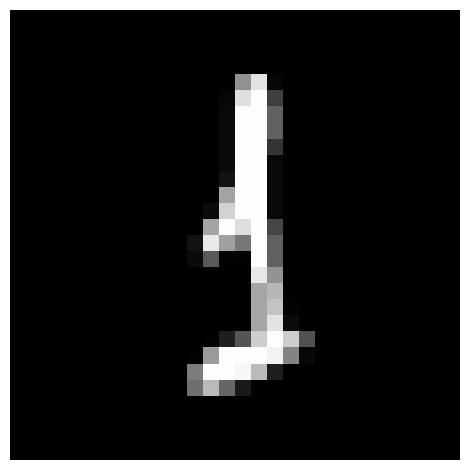

In [62]:
# Afprøver modellen på et givent index af billederne.
img_idx = 900
img = testing_images[img_idx][0]
pred = net(img)
print("Model output:")
print(pred)
sm = nn.Softmax(dim=1)
print("Efter softmax:")
print(sm(pred))
print(f"Modul bud: {pred.argmax()}")
print(f"Korrekt svar: {testing_images[img_idx][1]}")
ts.show(img)
img.shape

tensor([[1.40620e-10, 2.17173e-08, 4.41129e-06, 4.37217e-01, 1.12513e-18,
         5.62778e-01, 1.69446e-08, 7.01674e-11, 3.24554e-07, 1.08073e-19]],
       grad_fn=<SoftmaxBackward0>)
tensor(5)


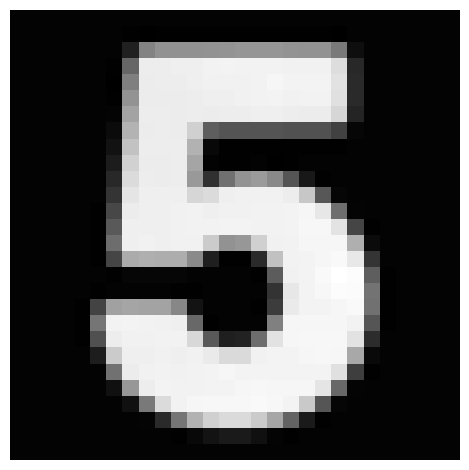

In [72]:
def preprocess(image):
    gs = torchvision.transforms.Grayscale(num_output_channels=1)
    image = image[0:3]
    image = torchvision.transforms.functional.resize(image, [28, 28], antialias=True)
    image = gs(image)
    image = image.float()/255
    image = torchvision.transforms.functional.invert(image)
    return image

torch.set_printoptions(precision=5)
image = torchvision.io.decode_image("images/image1.jpg")
image = preprocess(image)
ts.show(image)
print(sm(net(image)))
print(sm(net(image)).argmax())